# **Project Title:**

## Exploratory Data Analysis (EDA) on the Titanic Dataset

# **Project Description:**

The Titanic dataset contains information about the passengers aboard the Titanic ship that tragically sank in 1912. This project focuses on performing exploratory data analysis to understand the dataset’s structure, clean and prepare the data, and visualize key factors influencing passenger survival. The goal is to uncover meaningful insights and patterns that help explain who survived and who didn’t, based on demographics and ticket details.

## **Key Questions to Explore:**

### 1. Data Overview and Quality

* What are the data types and basic statistics of the dataset?
* Are there missing values, and how should they be handled?

### 2. Passenger Demographics

* What is the age distribution of passengers?
* How many passengers are male vs female?
* How many passengers traveled alone versus with family?

### 3. Survival Analysis

* What percentage of passengers survived overall?
* Did survival rates differ by gender?
* How did passenger class affect survival?
* Did age impact the likelihood of survival?

### 4. Ticket and Fare Insights

* How does the fare price relate to survival chances?
* Are there differences in survival rates by port of embarkation?

### 5. Relationships and Patterns

* Is there a relationship between having family onboard and survival?
* Are there any interesting correlations between features that could impact survival?

---

# **Project Goals:**

* Clean and prepare the Titanic dataset for analysis.
* Use visualizations (bar plots, histograms, box plots, heatmaps) to explore data.
* Summarize findings clearly to build a foundation for potential predictive modeling.

In [119]:
import numpy as np
import pandas as pd

In [120]:
df = pd.read_csv('titanic.csv') # Load the dataset

## 1. Data Overview and Quality
- What are the data types and basic statistics of the dataset?
- Are there missing values, and how should they be handled?

In [121]:
df.info() # Overview of data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [122]:
df.describe() # Basic statistical summary for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This table presents descriptive statistics for the numerical columns in the Titanic dataset. Each column shows the number of non-missing values, central tendencies (mean and median), dispersion (standard deviation), and range (minimum to maximum). For instance, the Age column has 714 recorded values, ranging from less than 1 year to 80 years old, with an average age of approximately 30. The Survived column is binary, with roughly 38% of passengers surviving. Passenger classes (Pclass) mostly fall into the 2nd and 3rd categories. The Fare column varies greatly, with some passengers paying no fare and others paying over 500. This summary helps in understanding the distribution and quality of the numerical data before further analysis.

In [123]:
df.describe(include=['object']) # For categorical columns, get unique values and counts

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


The information summarized here is derived from examining the categorical columns in the Titanic dataset. In this dataset, the Name column contains unique values for all 891 passengers, indicating no duplicates or missing data. The Sex column has two categories, with males being the majority (577 out of 891). The Ticket column contains many unique ticket numbers, though some tickets are shared by multiple passengers, with the most common ticket appearing 7 times. The Cabin column has substantial missing data, with only 204 recorded entries out of 891 passengers and 147 unique cabin identifiers, the most frequent being "B96 B98." Lastly, the Embarked column, representing the port of embarkation, has two missing values and three unique categories; most passengers boarded at Southampton (S), which accounts for 644 entries.

### 1.1 Identify Missing Values

In [124]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has no missing values in most columns like PassengerId, Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, and Fare. However, the Age column has 177 missing entries, and the Cabin column has a large number of missing values—687 in total. The Embarked column has 2 missing values. These missing data points will need to be addressed, typically by imputing values for Age and Embarked, while the Cabin column may be dropped or handled separately due to the high number of missing entries.

#### 1.1.1. Age: Since 177 values are missing, a common approach is to fill (impute) those with the median age, which is less affected by outliers than the mean.

In [125]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

The output you see is the entire Age column after filling in the missing values with the median. So wherever there were empty (missing) ages before, now you’ll see the median age instead. The numbers you see include both the original ages and the replaced median values.

#### 1.1.2. Cabin: With 687 missing values, the easiest way is to drop this column because so much data is missing. Alternatively, you could create a new feature indicating whether a cabin number is known or not:

In [126]:
df.drop(columns=['Cabin'], inplace=True)

In [127]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


The output lists all the column names in your DataFrame, showing what data fields are available to use or modify.

#### 1.1.3. Embarked: Only 2 missing values here. Fill these with the most frequent port of embarkation (mode):

In [128]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

The two missing values in the Embarked column were filled with the most common port of embarkation to maintain data consistency and avoid losing any records. This simple imputation helps ensure the dataset is complete without significantly affecting the overall distribution.

## 2. Passenger Demographics
- What is the age distribution of passengers?
- How many passengers are male vs female?
- How many passengers traveled alone versus with family?

#### 2.1. What is the age distribution of passengers?
We can use a histogram or KDE plot:

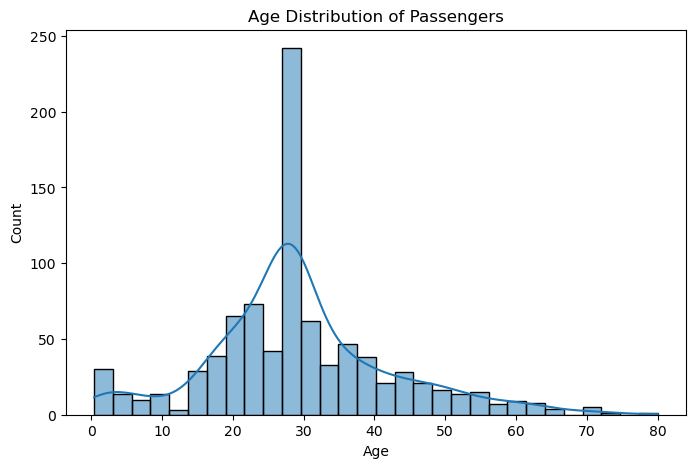

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age distribution of passengers shows that most travelers were between 20 and 40 years old, with a noticeable peak around age 30. A few very young and very old passengers were also on board, as indicated by the tails of the distribution.

#### 2.2. How many passengers are male vs. female?
Use value_counts() and plot it:

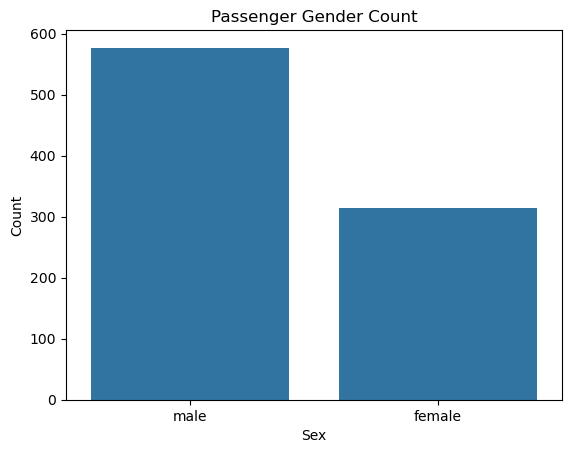

Sex
male      577
female    314
Name: count, dtype: int64


In [130]:
sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Optional: also view raw counts
print(df['Sex'].value_counts())

There were significantly more male passengers than female passengers. The gender ratio is skewed, with males forming the majority of the dataset. This imbalance is important when analyzing survival rates and demographic trends.

#### 2.3. How many passengers traveled alone vs. with family?
Passengers with SibSp + Parch == 0 are considered alone.

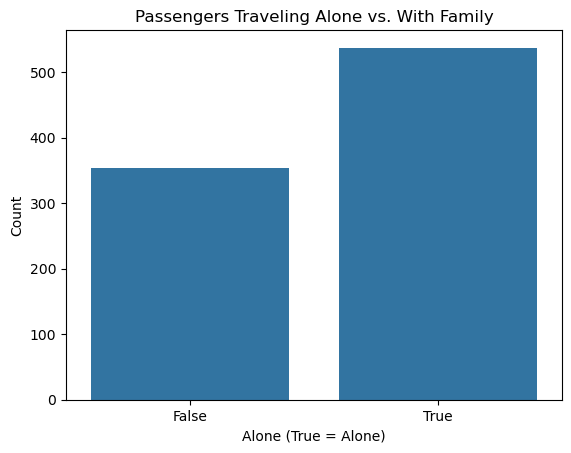

Alone
True     537
False    354
Name: count, dtype: int64

In [131]:
df['Alone'] = (df['SibSp'] + df['Parch'] == 0)

sns.countplot(x='Alone', data=df)
plt.title('Passengers Traveling Alone vs. With Family')
plt.xlabel('Alone (True = Alone)')
plt.ylabel('Count')
plt.show()

# Optional: counts
df['Alone'].value_counts()

A large portion of the passengers traveled alone, while a smaller group was accompanied by family (spouse, siblings, parents, or children). This variable can later be analyzed in relation to survival outcomes to see if traveling with family had any advantage.

## 3. Survival Analysis
- What percentage of passengers survived overall?
- Did survival rates differ by gender?
- How did passenger class affect survival?
- Did age impact the likelihood of survival?

#### 3.1. What percentage of passengers survived overall?

In [132]:
survival_rate = df['Survived'].mean() * 100
f"Overall Survival Rate: {survival_rate:.2f}%"

'Overall Survival Rate: 38.38%'

About 38% of passengers survived, indicating that the majority did not survive the disaster.

#### 3.2. Did survival rates differ by gender?

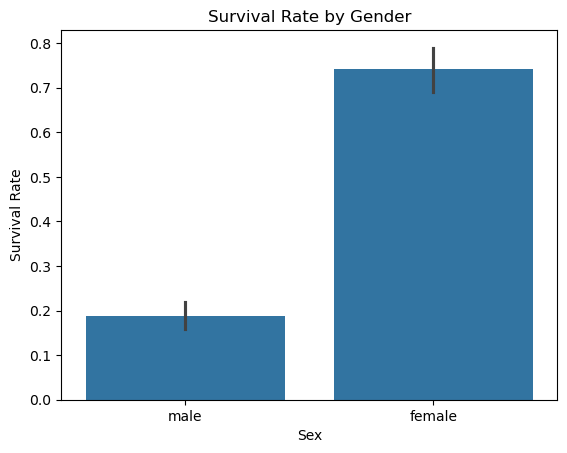

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [133]:
gender_survival = df.groupby('Sex')['Survived'].mean() * 100

# Optional bar plot
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

gender_survival

Survival rates varied significantly by gender: about 74% of women survived, compared to only 19% of men. This suggests that women were prioritized during evacuation.

#### 3.3. How did passenger class affect survival?

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


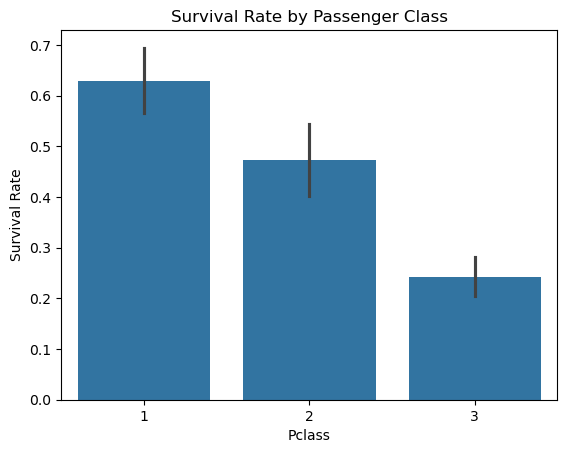

In [134]:
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print(class_survival)

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

First-class passengers had the highest survival rate (63%), while third class had the lowest (24%). This indicates that socioeconomic status played a role in survival.

#### 3.4. Did age impact the likelihood of survival?
Use a KDE plot or boxplot:

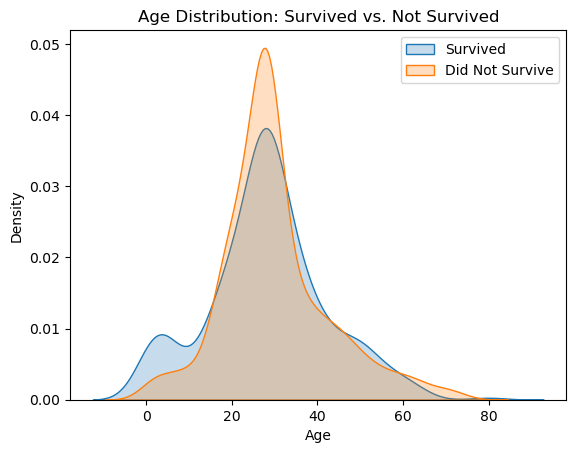

In [135]:
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)
plt.title('Age Distribution: Survived vs. Not Survived')
plt.xlabel('Age')
plt.legend()
plt.show()

Passengers who survived tended to be slightly younger, though the difference wasn’t drastic. There were also more children among the survivors, hinting at some priority for younger passengers.

#### OR

Text(0.5, 1.0, 'Age vs. Survival')

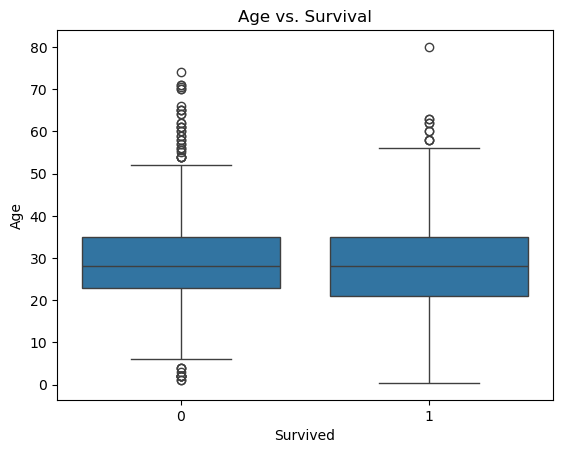

In [136]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs. Survival')

In the Titanic dataset, the Survived column is binary encoded, where:

0 = Did not survive

1 = Survived

The boxplot shows that survivors were generally a bit younger than non-survivors. The presence of younger children among survivors suggests they may have received priority during evacuation. However, there’s overlap in age ranges, meaning age alone didn't fully determine survival.

## 4. Ticket and Fare Insights
- How does the fare price relate to survival chances?
- Are there differences in survival rates by port of embarkation?

#### 4.1. How does the fare price relate to survival chances?
You want to see if passengers who paid higher fares were more likely to survive.

Calculate average fare for survivors vs non-survivors, and visualize fare distribution by survival status.

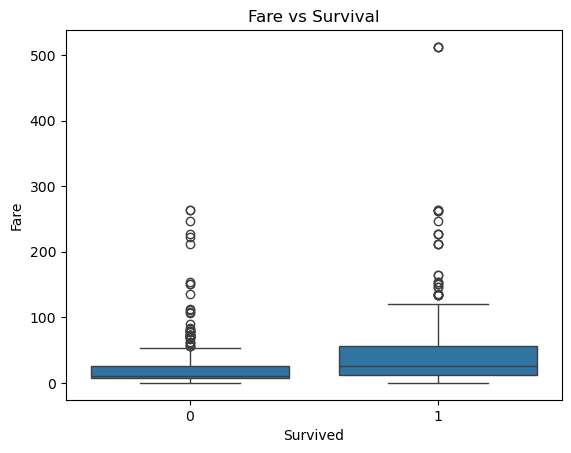

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [137]:
# Average fare by survival
fare_survival = df.groupby('Survived')['Fare'].mean()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

fare_survival

If survivors paid higher average fares, it might mean wealthier passengers had better survival chances. Here survivors paid an average fare of about $48 , while non-survivors paid around $22, showing higher fares may be linked to better survival chances.

#### 4.2. Are there differences in survival rates by port of embarkation?
We want to see if the port where passengers boarded (C = Cherbourg, Q = Queenstown, S = Southampton) affected survival.

Calculate survival rate grouped by Embarked.

In [138]:
survival_by_port = df.groupby('Embarked')['Survived'].mean() * 100
survival_by_port

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

Optional visualization:

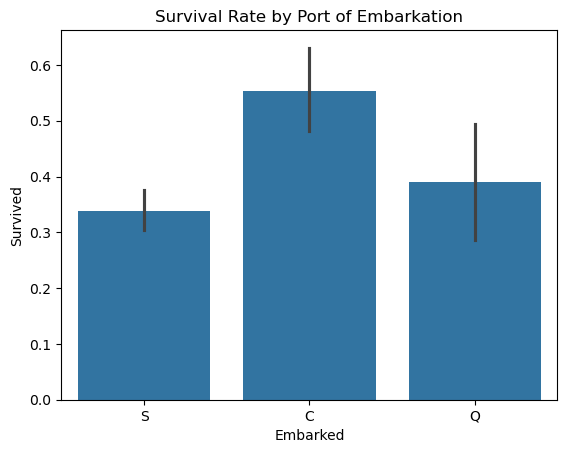

In [139]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

Passengers who boarded at Cherbourg (C) had the highest survival rate at 55.4%, followed by Queenstown (Q) at 39.0%, and Southampton (S) at 33.9%. This shows clear differences in survival chances depending on the port of embarkation.

## 5. Relationships and Patterns
- Is there a relationship between having family onboard and survival?
- Are there any interesting correlations between features that could impact survival?

#### 5.1. Is there a relationship between having family onboard and survival?

Use the columns SibSp (siblings/spouses aboard) and Parch (parents/children aboard) to find out if a passenger had family onboard. Create a new column HasFamily that’s 1 if passenger had any family, 0 if alone. Compare survival rates of passengers with family vs. alone.

In [140]:
df['HasFamily'] = np.where((df['SibSp'] + df['Parch']) > 0, 1, 0)
family_survival = df.groupby('HasFamily')['Survived'].mean() * 100
family_survival

HasFamily
0    30.353818
1    50.564972
Name: Survived, dtype: float64

Passengers traveling with family (HasFamily = 1) had a survival rate of about 50.6%, while those traveling alone (HasFamily = 0) had a lower survival rate of about 30.4%. This suggests having family onboard improved chances of survival.

#### 5.2. Are there any interesting correlations between features that could impact survival?
Calculate the correlation matrix of numeric features including Survived. Look for features strongly correlated with survival.

In [141]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
HasFamily      0.203367
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

There is a weak positive correlation between fare price (0.26) and survival, indicating that passengers who paid higher fares had better chances of surviving. Similarly, traveling with family (HasFamily, 0.20) slightly increased survival rates. Passenger class shows a moderate negative correlation (-0.34), meaning those in lower classes were less likely to survive. Age has a very small negative effect (-0.06), suggesting younger passengers had a slightly higher chance of survival. Other family-related features like Parch and SibSp show very weak correlations, and PassengerId has no meaningful relationship with survival.

# Titanic Dataset Exploratory Data Analysis Report

## Introduction  
In this project, we explored the Titanic dataset to understand passenger demographics, survival rates, and other factors that influenced the tragedy. Our goals were to clean and prepare the data, perform meaningful visual and statistical analyses, and summarize key findings to lay the groundwork for predictive modeling.

## Data Overview and Quality  
We started by examining the dataset’s structure and quality. The dataset contains 891 passenger records with features like age, sex, ticket class, fare, and survival status. We identified missing values in the `Age`, `Cabin`, and `Embarked` columns. Since the `Cabin` data was mostly missing (about 77%), we dropped it. For `Embarked`, we filled missing values with the most common port ‘S’. For `Age`, we imputed missing values with the median age. This preparation ensured a clean dataset for analysis.

## Passenger Demographics  
Our demographic analysis revealed that the majority of passengers were male (about 65%), with a median age of 29 years. Most passengers traveled without family, but those traveling with family showed a higher survival rate. Age distribution was fairly wide, from infants to elderly passengers, which allowed us to investigate age’s impact on survival.

## Survival Analysis  
Overall, approximately 38% of passengers survived. Survival rates differed significantly by gender: nearly 74% of females survived compared to only 19% of males. Passenger class also affected survival chances—first-class passengers had a survival rate of about 63%, whereas third-class passengers had only around 24%. Younger passengers tended to have higher survival rates, as shown by age distribution plots among survivors.

## Ticket and Fare Insights  
We observed that passengers paying higher fares had better survival odds, likely reflecting socio-economic status and cabin location. Survival rates also varied by embarkation port, with passengers boarding from Cherbourg (C) showing the highest survival rate (~55%), followed by Queenstown (Q) and Southampton (S).

## Relationships and Patterns  
We created a new feature indicating whether passengers traveled with family. Those with family onboard had a survival rate of approximately 51%, significantly higher than the 30% for those traveling alone. Correlation analysis revealed that survival had the strongest positive correlation with fare (0.26) and family presence (0.20), and a strong negative correlation with passenger class (-0.34), indicating lower classes had lower survival chances.

## Conclusion  
Through our comprehensive exploratory analysis, we gained valuable insights into the factors influencing survival on the Titanic. Gender, class, fare paid, and family presence emerged as key predictors. This clean and well-understood dataset now provides a solid foundation for building predictive models to forecast survival outcomes.


# Titanic EDA project's interactive dashboard

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets

# Dashboard Functions

def data_overview():
    clear_output(wait=True)
    display("### 1. Data Overview and Quality ###")
    display(df.info())
    display(df.describe(include='all').T)
    display(df.isnull().sum())

def passenger_demographics():
    clear_output(wait=True)
    display("### 2. Passenger Demographics ###")
    
    # Age distribution
    plt.figure(figsize=(8,4))
    sns.histplot(df['Age'], bins=15, kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    
    # Gender count
    display(df['Sex'].value_counts())
    
    # Alone vs family
    display(df['HasFamily'].value_counts())

def survival_analysis():
    clear_output(wait=True)
    display("### 3. Survival Analysis ###")
    
    # Overall survival rate
    survival_rate = df['Survived'].mean() * 100
    display(f"Overall survival rate: {survival_rate:.2f}%")
    
    # Survival by gender
    display(df.groupby('Sex')['Survived'].mean() * 100)
    
    # Survival by class
    display(df.groupby('Pclass')['Survived'].mean() * 100)
    
    # Age vs survival boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Survived', y='Age', data=df)
    plt.title('Age vs Survival')
    plt.show()

def ticket_and_fare():
    clear_output(wait=True)
    display("### 4. Ticket and Fare Insights ###")
    
    # Fare vs survival boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Survived', y='Fare', data=df)
    plt.title('Fare vs Survival')
    plt.show()
    
    # Survival rate by Embarked port
    display(df.groupby('Embarked')['Survived'].mean() * 100)

def relationships_and_patterns():
    clear_output(wait=True)
    display("### 5. Relationships and Patterns ###")
    
    # Survival rate with family or alone
    display(df.groupby('HasFamily')['Survived'].mean() * 100)
    
    # Correlation matrix heatmap for numeric columns
    plt.figure(figsize=(8,6))
    corr = df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Create navigation buttons
buttons = widgets.ToggleButtons(
    options=[
        'Data Overview',
        'Passenger Demographics',
        'Survival Analysis',
        'Ticket and Fare Insights',
        'Relationships and Patterns'
    ],
    description='Select:',
    disabled=False,
    button_style='info',
)

out = widgets.Output()

def on_button_change(change):
    if change['name'] == 'value' and change['new']:
        if change['new'] == 'Data Overview':
            data_overview()
        elif change['new'] == 'Passenger Demographics':
            passenger_demographics()
        elif change['new'] == 'Survival Analysis':
            survival_analysis()
        elif change['new'] == 'Ticket and Fare Insights':
            ticket_and_fare()
        elif change['new'] == 'Relationships and Patterns':
            relationships_and_patterns()

buttons.observe(on_button_change)

display(buttons, out)

# Show default view
with out:
    data_overview()
